In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
#os.environ['KERAS_BACKEND'] = 'theano'
#pip install -U git+https://github.com/taller-mexicano-de-nebulosas-ionizadas/AI.git@devel
import tmniai as tm

/home/morisset/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
Using TensorFlow backend.


In [2]:
from tmniai.Regressor.RegressionModel import K
print(K.backend())

tensorflow


In [3]:
n_samples=3000
y1 = np.random.uniform(-10, 10, n_samples)
X1 = y1**2
y2 = np.random.uniform(0, 10, n_samples)
X2 = y2**2
X_test = np.linspace(0,100,1000)

W0913 15:48:34.414900 139930826512192 deprecation_wrapper.py:119] From /home/morisset/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:107: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0913 15:48:34.425587 139930826512192 deprecation_wrapper.py:119] From /home/morisset/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:111: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0913 15:48:34.427477 139930826512192 deprecation_wrapper.py:119] From /home/morisset/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/home/morisset/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please c

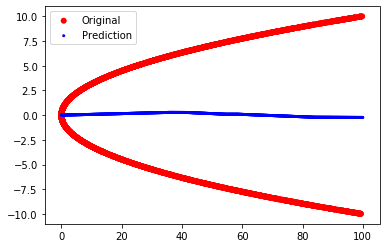

In [4]:
RM = tm.manage_RM(RM_type = 'ANN', X_train=X1, y_train=y1,
                   scaling=True, clear_session=True)
RM.init_RM(hidden_layer_sizes=(10,))
RM.train_RM()
RM.set_test(X_test, scaleit=True)
RM.predict(scoring=False)
pred = RM.pred
f, ax = plt.subplots()
ax.scatter(X1, y1, edgecolor='', c='r', label='Original')
ax.scatter(X_test, pred, edgecolor='', c='b', marker='.', label='Prediction')
ax.legend()

In [5]:
def test_x2(X, y, X_test, solver='adam', activation='tanh', hidden_layer_sizes=(10,), noise=False, 
            discret=False, verbose=False, plot_ori=True):
    """
    Creating, training and ploting Regressor Machine for y = sqrt(X) problem.
    Using the tmniai Regressor machine tool
    """
    if plot_ori:
        plt.scatter(X, y, edgecolor='', c='r', label='Ori')
    if discret:
        RM1 = tm.manage_RM(RM_type = 'KerasDis', X_train=X, y_train=y, verbose=verbose, 
                        noise=noise, y_vects=np.linspace(-10,10,100), scaling=True, 
                        clear_session=True)
        RM1.init_RM(solver=solver, activation=activation,
                    hidden_layer_sizes=hidden_layer_sizes, epochs=100)
        RM1.train_RM()
        RM1.set_test(X_test, scaleit=True)
        RM1.predict(scoring=False, reduce_by='max')
        pred_max = RM1.pred
        RM1.predict(scoring=False, reduce_by='mean')
        pred_mean = RM1.pred
        plt.scatter(X_test, pred_max, edgecolor='', c='y', label='Max')
        plt.scatter(X_test, pred_mean, edgecolor='', c='c', label='Mean')    
    else:
        RM1 = tm.manage_RM(RM_type = 'Keras', X_train=X, y_train=y, verbose=verbose, 
                        noise=noise, scaling=True, clear_session=True)
        RM1.init_RM(solver=solver, activation=activation,
                    hidden_layer_sizes=hidden_layer_sizes, epochs=100)
        RM1.train_RM()
        RM1.set_test(X_test, scaleit=True)
        RM1.predict(scoring=False)
        pred = RM1.pred
        plt.scatter(X_test, pred, edgecolor='', c='b', marker='.', label='Single')
    plt.legend()

W0913 15:48:35.344773 139930826512192 deprecation_wrapper.py:119] From /home/morisset/GoogleDrive/Pro/AI/tmniai/Regressor/RegressionModel.py:236: The name tf.random.set_random_seed is deprecated. Please use tf.compat.v1.random.set_random_seed instead.

W0913 15:48:35.345725 139930826512192 deprecation_wrapper.py:119] From /home/morisset/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0913 15:48:35.346912 139930826512192 deprecation_wrapper.py:119] From /home/morisset/anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0913 15:48:35.362696 139930826512192 deprecation_wrapper.py:119] From /home/morisset/anaconda3/lib/python3.7/site-packages/keras/optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



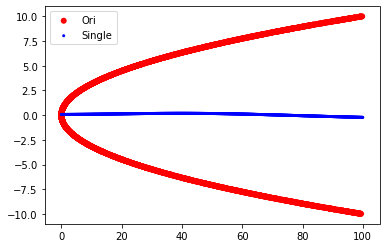

In [6]:
# Training with positive and negative values leads to wrong result from the single regressor and the mean of the discretized regressor
test_x2(X1, y1, X_test)

W0913 15:48:40.928868 139930826512192 deprecation.py:323] From /home/morisset/anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


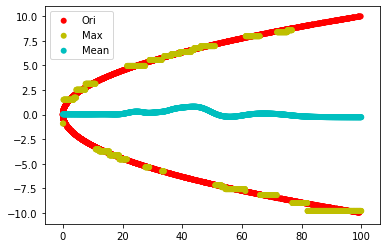

In [7]:
# Training with positive and negative values leads to wrong result from the single regressor and the mean of the discretized regressor
# The max value is OK
test_x2(X1, y1, X_test, discret=True)

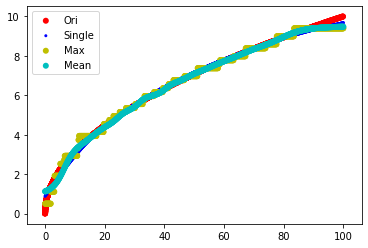

In [8]:
# Training with positive values only solves the issue. But data can be double valued without the user knowing it
test_x2(X2, y2, X_test)
test_x2(X2, y2, X_test, discret=True, plot_ori=False)

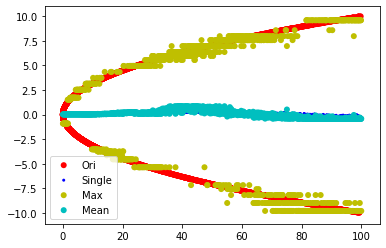

In [9]:
# Adding noise to the [-10, 10] data set
test_x2(X1, y1, X_test, noise=0.1)
test_x2(X1, y1, X_test, noise=0.1, discret=True, plot_ori=False)

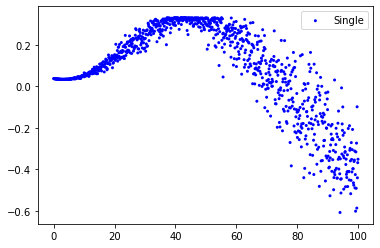

In [10]:
# Close-up to the single regressor result: it appears to be a small but small relation (plus noise), not 0.0 mean.
test_x2(X1, y1, X_test, noise=0.1, discret=False, plot_ori=False)